In [5]:
import json
import os
import bracketManipulations as bm
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
def upsetsCalc(year, strVector, regions):
    vector = bm.stringToVector(strVector)
    firstRoundList = bm.bracketToSeeds(vector)[0]
    firstRoundRegions = []
    for x in range (0, len(firstRoundList), 16):
        region = []
        for y in range (0, 16):
            region.append(firstRoundList[x+y])
        firstRoundRegions.append(region)

    secondRoundList = bm.bracketToSeeds(vector)[1]
    secondRoundRegions = []
    for x in range (0, len(secondRoundList), 8):
        region = []
        for y in range (0, 8):
            region.append(secondRoundList[x+y])
        secondRoundRegions.append(region)

    thirdRoundList = bm.bracketToSeeds(vector)[2]
    thirdRoundRegions = []
    for x in range (0, len(thirdRoundList), 4):
        region = []
        for y in range (0, 4):
            region.append(thirdRoundList[x+y])
        thirdRoundRegions.append(region)

    fourthRoundList = bm.bracketToSeeds(vector)[3]
    fourthRoundRegions = []
    for x in range (0, len(fourthRoundList), 2):
        region = []
        for y in range (0, 2):
            region.append(fourthRoundList[x+y])
        fourthRoundRegions.append(region)

    fifthRoundList = bm.bracketToSeeds(vector)[4]
    fifthRoundRegions = []
    for x in range (0, len(fifthRoundList), 1):
        region = []
        for y in range (0, 1):
            region.append(fifthRoundList[x+y])
        fifthRoundRegions.append(region)

    #upsetsList = [0, 0, 0, 0]
    upsetsList = {'Year': year, regions[0]: 0, regions[1]: 0, regions[2]: 0, regions[3]: 0}
    #Python tuples are immutable so using a dictionary or map may be better.

    for i in range (0, len(firstRoundRegions)):
        numUpsetsForRegion = 0

        firstRoundRegion = firstRoundRegions[i]
        secondRoundRegion = secondRoundRegions[i]

        pairs = list(zip(firstRoundRegion[::2], firstRoundRegion[1::2]))

        for j in range (0, len(secondRoundRegion)):
            tupl = pairs[j]
            seedOne = tupl[0]
            seedTwo = tupl[1]
            if (secondRoundRegion[j] == max(seedOne, seedTwo)):
                numUpsetsForRegion += 1
        
        #upsetsList[i] += numUpsetsForRegion
        upsetsList[regions[i]] += numUpsetsForRegion

    for i in range (0, len(secondRoundRegions)):
        numUpsetsForRegion = 0

        secondRoundRegion = secondRoundRegions[i]
        thirdRoundRegion = thirdRoundRegions[i]

        pairs = list(zip(secondRoundRegion[::2], secondRoundRegion[1::2]))

        for j in range (0, len(thirdRoundRegion)):
            tupl = pairs[j]
            seedOne = tupl[0]
            seedTwo = tupl[1]
            if (thirdRoundRegion[j] == max(seedOne, seedTwo)):
                numUpsetsForRegion += 1
        
        # upsetsList[i] += numUpsetsForRegion
        upsetsList[regions[i]] += numUpsetsForRegion

    for i in range (0, len(thirdRoundRegions)):
        numUpsetsForRegion = 0

        thirdRoundRegion = thirdRoundRegions[i]
        fourthRoundRegion = fourthRoundRegions[i]

        pairs = list(zip(thirdRoundRegion[::2], thirdRoundRegion[1::2]))

        for j in range (0, len(fourthRoundRegion)):
            tupl = pairs[j]
            seedOne = tupl[0]
            seedTwo = tupl[1]
            if (fourthRoundRegion[j] == max(seedOne, seedTwo)):
                numUpsetsForRegion += 1
        
        # upsetsList[i] += numUpsetsForRegion
        upsetsList[regions[i]] += numUpsetsForRegion

    for i in range (0, len(fourthRoundRegions)):
        numUpsetsForRegion = 0

        fourthRoundRegion = fourthRoundRegions[i]
        fifthRoundRegion = fifthRoundRegions[i]

        pairs = list(zip(fourthRoundRegion[::2], fourthRoundRegion[1::2]))

        for j in range (0, len(fifthRoundRegion)):
            tupl = pairs[j]
            seedOne = tupl[0]
            seedTwo = tupl[1]
            if (fifthRoundRegion[j] == max(seedOne, seedTwo)):
                numUpsetsForRegion += 1
        
        # upsetsList[i] += numUpsetsForRegion
        upsetsList[regions[i]] += numUpsetsForRegion
    return upsetsList

In [7]:
brackets = []
with open ('allBracketsTTT.json') as jsonFile:
    data = json.load(jsonFile)
    for bracketDict in data['brackets']:
        bracket = bracketDict['bracket']
        year = bracket['year']
        vector = bracket['fullvector']
        regionOrder = []
        for region in bracketDict['bracket']['regions']:
            regionOrder.append(region['name'])
        brackets.append((year, vector, regionOrder))
        
for bracket in brackets:
    print (bracket)

('1985', '100101111101111111111111000101101101111110100111001110110101000', ['West', 'East', 'Midwest', 'Southeast'])
('1986', '111101011110110111111110000100110110111101101101110111111111011', ['Southeast', 'West', 'East', 'Midwest'])
('1987', '100111111110101111011011101101101010111110110101111011110100001', ['West', 'Midwest', 'Southeast', 'East'])
('1988', '101110111011010111001111010100111111011100101111111111110111101', ['Midwest', 'East', 'West', 'Southeast'])
('1989', '101101011000101101001111100010101100111110100100101111000010001', ['Midwest', 'Southeast', 'East', 'West'])
('1990', '101110111010011110101111111111101111111101110110111010011001011', ['Southeast', 'West', 'East', 'Midwest'])
('1991', '111101011000111111100111010000100011001101101111111111000110001', ['West', 'Midwest', 'East', 'Southeast'])
('1992', '101111110011011101110011010110101111011000101110011111100100010', ['Midwest', 'Southeast', 'East', 'West'])
('1993', '1111011111011111000111011011011111111110101011

In [8]:
upsetsList = []

for tupl in brackets:
    upsetsList.append(upsetsCalc(tupl[0], tupl[1], tupl[2]))
    
for upsetList in upsetsList:
    print (upsetList)

{'Year': '1985', 'West': 5, 'East': 0, 'Midwest': 5, 'Southeast': 6}
{'Year': '1986', 'Southeast': 6, 'West': 2, 'East': 5, 'Midwest': 4}
{'Year': '1987', 'West': 4, 'Midwest': 4, 'Southeast': 5, 'East': 5}
{'Year': '1988', 'Midwest': 5, 'East': 5, 'West': 2, 'Southeast': 3}
{'Year': '1989', 'Midwest': 3, 'Southeast': 5, 'East': 5, 'West': 5}
{'Year': '1990', 'Southeast': 4, 'West': 6, 'East': 4, 'Midwest': 6}
{'Year': '1991', 'West': 3, 'Midwest': 3, 'East': 6, 'Southeast': 2}
{'Year': '1992', 'Midwest': 4, 'Southeast': 5, 'East': 2, 'West': 3}
{'Year': '1993', 'Southeast': 3, 'West': 5, 'East': 1, 'Midwest': 3}
{'Year': '1994', 'West': 3, 'Midwest': 5, 'East': 7, 'Southeast': 3}
{'Year': '1995', 'Midwest': 3, 'Southeast': 4, 'East': 5, 'West': 2}
{'Year': '1996', 'Southeast': 5, 'West': 4, 'East': 3, 'Midwest': 3}
{'Year': '1997', 'West': 1, 'Midwest': 2, 'East': 5, 'Southeast': 6}
{'Year': '1998', 'East': 2, 'West': 4, 'Midwest': 7, 'South': 4}
{'Year': '1999', 'East': 6, 'Midwest':

In [9]:
formattedUpsetsList = []

for upsets in upsetsList:
    #create new dictionary that has southeast changed to south etc
    if ('Southeast' in upsets.keys() and not('Southwest' in upsets.keys())):
        formattedUpsetsList.append({'Year': int(upsets['Year']), 'Midwest': upsets['Midwest'], 'West': upsets['West'], 'East': upsets['East'], 'South': upsets['Southeast']})
    elif ('Southwest' in upsets.keys()):
        formattedUpsetsList.append({'Year': int(upsets['Year']), 'Midwest': upsets['Southwest'], 'West': upsets['West'], 'East': upsets['East'], 'South': upsets['Southeast']})
    else:
        formattedUpsetsList.append({'Year': int(upsets['Year']), 'Midwest': upsets['Midwest'], 'West': upsets['West'], 'East': upsets['East'], 'South': upsets['South']})


df = pd.DataFrame(formattedUpsetsList)

print (df)

    Year  Midwest  West  East  South
0   1985        5     5     0      6
1   1986        4     2     5      6
2   1987        4     4     5      5
3   1988        5     2     5      3
4   1989        3     5     5      5
5   1990        6     6     4      4
6   1991        3     3     6      2
7   1992        4     3     2      5
8   1993        3     5     1      3
9   1994        5     3     7      3
10  1995        3     2     5      4
11  1996        3     4     3      5
12  1997        2     1     5      6
13  1998        7     4     2      4
14  1999        5     6     6      6
15  2000        1     6     6      6
16  2001        3     6     4      7
17  2002        2     5     3      5
18  2003        4     5     5      5
19  2004        5     4     2      3
20  2005        5     4     5      5
21  2006        4     5     6      5
22  2007        4     2     4      2
23  2008        6     4     2      1
24  2009        6     4     3      2
25  2010        6     4     7      3
2

In [10]:
print ("Upset Region Details:")
print (df[['Midwest', 'West', 'East', 'South']].describe())

Upset Region Details:
         Midwest       West       East      South
count  35.000000  35.000000  35.000000  35.000000
mean    4.342857   4.000000   4.171429   4.400000
std     1.747988   1.475287   1.653618   1.701211
min     1.000000   1.000000   0.000000   1.000000
25%     3.000000   3.000000   3.000000   3.000000
50%     4.000000   4.000000   5.000000   5.000000
75%     5.000000   5.000000   5.000000   5.000000
max     9.000000   8.000000   7.000000   9.000000


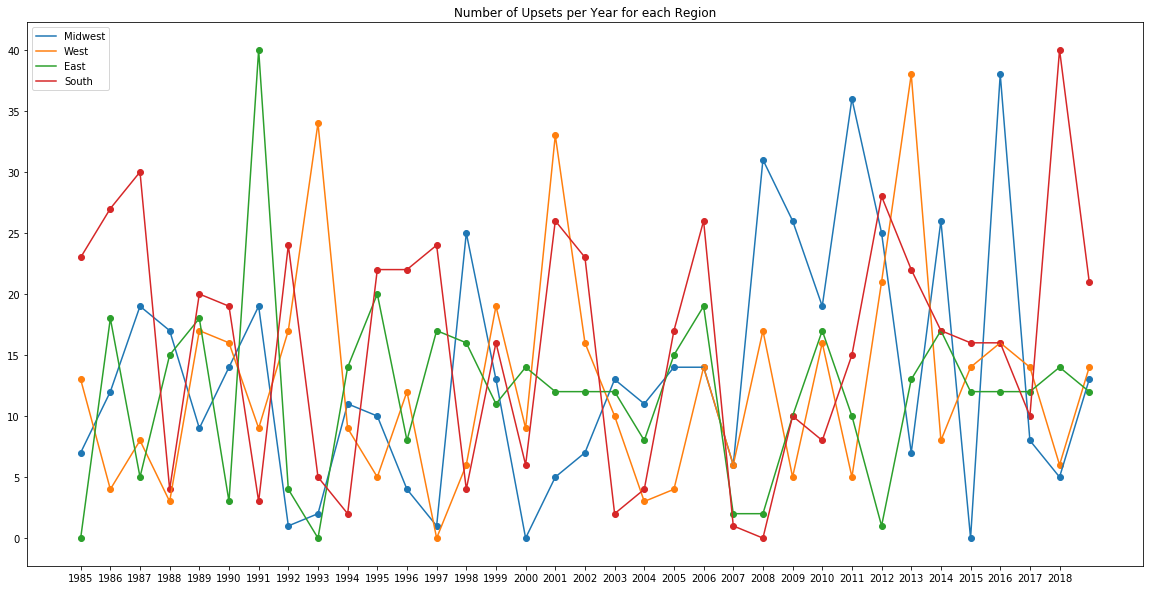

In [24]:
plt.scatter(df['Year'], df['Midwest'])
plt.plot(df['Year'], df['Midwest'], label = 'Midwest')

plt.scatter(df['Year'], df['West'])
plt.plot(df['Year'], df['West'], label = 'West')

plt.scatter(df['Year'], df['East'])
plt.plot(df['Year'], df['East'], label = 'East')

plt.scatter(df['Year'], df['South'])
plt.plot(df['Year'], df['South'], label = 'South')

plt.xticks(range(1985, 2019))
plt.legend()
plt.rcParams['figure.figsize'] = [20, 5]
plt.title("Number of Upsets per Year for each Region")
plt.show()

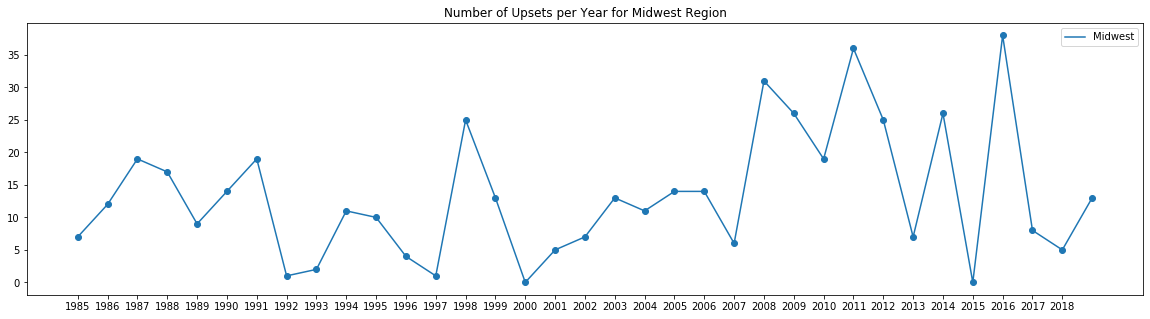

In [25]:
plt.scatter(df['Year'], df['Midwest'])
plt.plot(df['Year'], df['Midwest'], label = 'Midwest')
plt.xticks(range(1985, 2019))
plt.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.title("Number of Upsets per Year for Midwest Region")
plt.show()

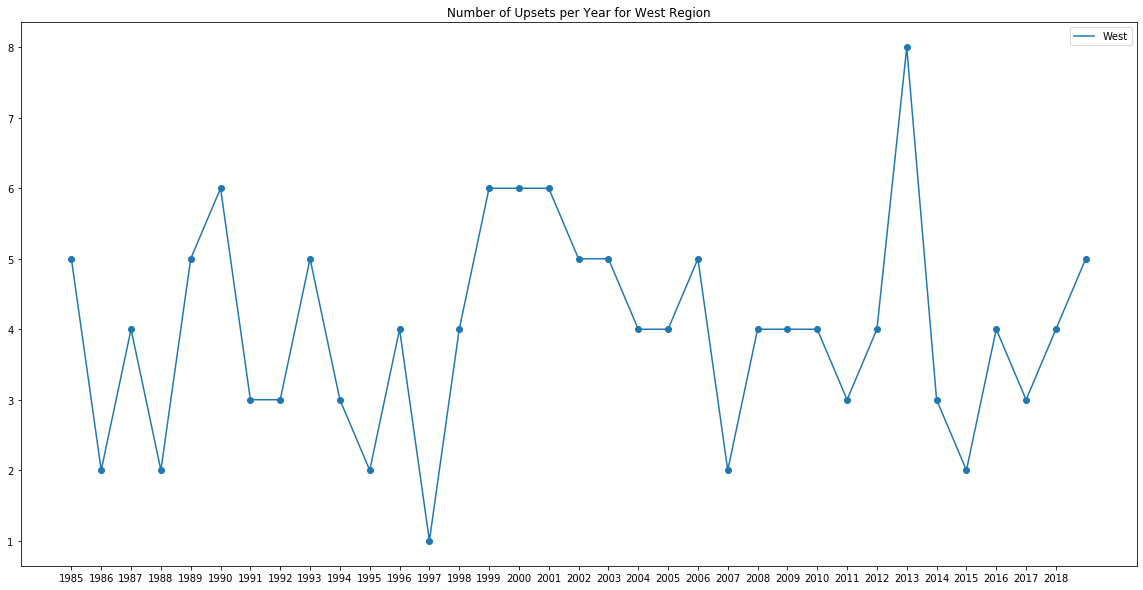

In [13]:
plt.scatter(df['Year'], df['West'])
plt.plot(df['Year'], df['West'], label = 'West')
plt.xticks(range(1985, 2019))
plt.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.title("Number of Upsets per Year for West Region")
plt.show()

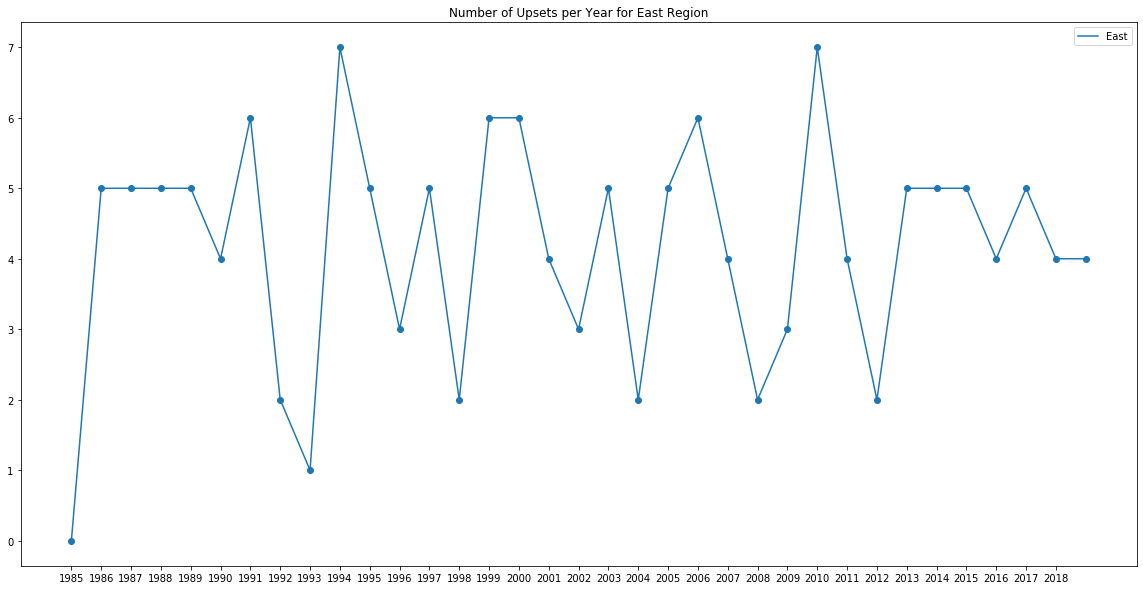

In [14]:
plt.scatter(df['Year'], df['East'])
plt.plot(df['Year'], df['East'], label = 'East')
plt.xticks(range(1985, 2019))
plt.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.title("Number of Upsets per Year for East Region")
plt.show()

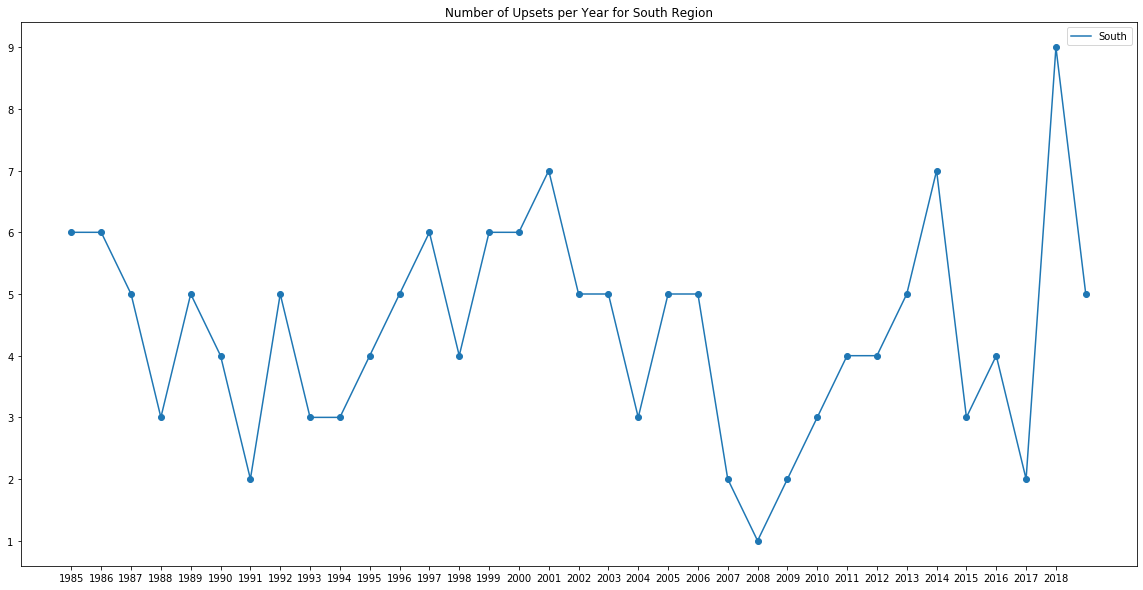

In [15]:
plt.scatter(df['Year'], df['South'])
plt.plot(df['Year'], df['South'], label = 'South')
plt.xticks(range(1985, 2019))
plt.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.title("Number of Upsets per Year for South Region")
plt.show()

In [16]:
def upsetsWeightedCalc(year, strVector, regions):
    vector = bm.stringToVector(strVector)
    firstRoundList = bm.bracketToSeeds(vector)[0]
    firstRoundRegions = []
    for x in range (0, len(firstRoundList), 16):
        region = []
        for y in range (0, 16):
            region.append(firstRoundList[x+y])
        firstRoundRegions.append(region)

    secondRoundList = bm.bracketToSeeds(vector)[1]
    secondRoundRegions = []
    for x in range (0, len(secondRoundList), 8):
        region = []
        for y in range (0, 8):
            region.append(secondRoundList[x+y])
        secondRoundRegions.append(region)

    thirdRoundList = bm.bracketToSeeds(vector)[2]
    thirdRoundRegions = []
    for x in range (0, len(thirdRoundList), 4):
        region = []
        for y in range (0, 4):
            region.append(thirdRoundList[x+y])
        thirdRoundRegions.append(region)

    fourthRoundList = bm.bracketToSeeds(vector)[3]
    fourthRoundRegions = []
    for x in range (0, len(fourthRoundList), 2):
        region = []
        for y in range (0, 2):
            region.append(fourthRoundList[x+y])
        fourthRoundRegions.append(region)

    fifthRoundList = bm.bracketToSeeds(vector)[4]
    fifthRoundRegions = []
    for x in range (0, len(fifthRoundList), 1):
        region = []
        for y in range (0, 1):
            region.append(fifthRoundList[x+y])
        fifthRoundRegions.append(region)

    #upsetsList = [0, 0, 0, 0]
    upsetsList = {'Year': year, regions[0]: 0, regions[1]: 0, regions[2]: 0, regions[3]: 0}
    #Python tuples are immutable so using a dictionary or map may be better.

    for i in range (0, len(firstRoundRegions)):
        numUpsetsForRegion = 0

        firstRoundRegion = firstRoundRegions[i]
        secondRoundRegion = secondRoundRegions[i]

        pairs = list(zip(firstRoundRegion[::2], firstRoundRegion[1::2]))

        for j in range (0, len(secondRoundRegion)):
            tupl = pairs[j]
            seedOne = tupl[0]
            seedTwo = tupl[1]
            if (secondRoundRegion[j] == max(seedOne, seedTwo)):
                numUpsetsForRegion += secondRoundRegion[j] - min(seedOne, seedTwo)
        
        #upsetsList[i] += numUpsetsForRegion
        upsetsList[regions[i]] += numUpsetsForRegion

    for i in range (0, len(secondRoundRegions)):
        numUpsetsForRegion = 0

        secondRoundRegion = secondRoundRegions[i]
        thirdRoundRegion = thirdRoundRegions[i]

        pairs = list(zip(secondRoundRegion[::2], secondRoundRegion[1::2]))

        for j in range (0, len(thirdRoundRegion)):
            tupl = pairs[j]
            seedOne = tupl[0]
            seedTwo = tupl[1]
            if (thirdRoundRegion[j] == max(seedOne, seedTwo)):
                numUpsetsForRegion += thirdRoundRegion[j] - max(seedOne, seedTwo)
        
        # upsetsList[i] += numUpsetsForRegion
        upsetsList[regions[i]] += numUpsetsForRegion

    for i in range (0, len(thirdRoundRegions)):
        numUpsetsForRegion = 0

        thirdRoundRegion = thirdRoundRegions[i]
        fourthRoundRegion = fourthRoundRegions[i]

        pairs = list(zip(thirdRoundRegion[::2], thirdRoundRegion[1::2]))

        for j in range (0, len(fourthRoundRegion)):
            tupl = pairs[j]
            seedOne = tupl[0]
            seedTwo = tupl[1]
            if (fourthRoundRegion[j] == max(seedOne, seedTwo)):
                numUpsetsForRegion += fourthRoundRegion[j] - min(seedOne, seedTwo)
        
        # upsetsList[i] += numUpsetsForRegion
        upsetsList[regions[i]] += numUpsetsForRegion

    for i in range (0, len(fourthRoundRegions)):
        numUpsetsForRegion = 0

        fourthRoundRegion = fourthRoundRegions[i]
        fifthRoundRegion = fifthRoundRegions[i]

        pairs = list(zip(fourthRoundRegion[::2], fourthRoundRegion[1::2]))

        for j in range (0, len(fifthRoundRegion)):
            tupl = pairs[j]
            seedOne = tupl[0]
            seedTwo = tupl[1]
            if (fifthRoundRegion[j] == max(seedOne, seedTwo)):
                numUpsetsForRegion += fifthRoundRegion[j] - min(seedOne, seedTwo)
        
        # upsetsList[i] += numUpsetsForRegion
        upsetsList[regions[i]] += numUpsetsForRegion
    return upsetsList

In [17]:
filePath = 'allBracketsTTT.json'

brackets = []
with open (filePath) as jsonFile:
    data = json.load(jsonFile)
    for bracketDict in data['brackets']:
        bracket = bracketDict['bracket']
        year = bracket['year']
        vector = bracket['fullvector']
        regionOrder = []
        for region in bracketDict['bracket']['regions']:
            regionOrder.append(region['name'])
        brackets.append((year, vector, regionOrder))

upsetsList = []

for tupl in brackets:
    upsetsList.append(upsetsWeightedCalc(tupl[0], tupl[1], tupl[2]))

formattedUpsetsList = []

for upsets in upsetsList:
    #create new dictionary that has southeast changed to south etc
    if ('Southeast' in upsets.keys() and not('Southwest' in upsets.keys())):
        formattedUpsetsList.append({'Year': int(upsets['Year']), 'Midwest': upsets['Midwest'], 'West': upsets['West'], 'East': upsets['East'], 'South': upsets['Southeast']})
    elif ('Southwest' in upsets.keys()):
        formattedUpsetsList.append({'Year': int(upsets['Year']), 'Midwest': upsets['Southwest'], 'West': upsets['West'], 'East': upsets['East'], 'South': upsets['Southeast']})
    else:
        formattedUpsetsList.append({'Year': int(upsets['Year']), 'Midwest': upsets['Midwest'], 'West': upsets['West'], 'East': upsets['East'], 'South': upsets['South']})


df = pd.DataFrame(formattedUpsetsList)

print (df)

    Year  Midwest  West  East  South
0   1985        7    13     0     23
1   1986       12     4    18     27
2   1987       19     8     5     30
3   1988       17     3    15      4
4   1989        9    17    18     20
5   1990       14    16     3     19
6   1991       19     9    40      3
7   1992        1    17     4     24
8   1993        2    34     0      5
9   1994       11     9    14      2
10  1995       10     5    20     22
11  1996        4    12     8     22
12  1997        1     0    17     24
13  1998       25     6    16      4
14  1999       13    19    11     16
15  2000        0     9    14      6
16  2001        5    33    12     26
17  2002        7    16    12     23
18  2003       13    10    12      2
19  2004       11     3     8      4
20  2005       14     4    15     17
21  2006       14    14    19     26
22  2007        6     6     2      1
23  2008       31    17     2      0
24  2009       26     5    10     10
25  2010       19    16    17      8
2

In [18]:
print ("Weighted Upset Region Details:")
print (df[['Midwest', 'West', 'East', 'South']].describe())

Weighted Upset Region Details:
         Midwest       West       East      South
count  35.000000  35.000000  35.000000  35.000000
mean   13.371429  12.600000  11.857143  15.800000
std     9.997311   8.789031   7.542596  10.078515
min     0.000000   0.000000   0.000000   0.000000
25%     6.500000   6.000000   8.000000   5.500000
50%    12.000000  12.000000  12.000000  17.000000
75%    19.000000  16.000000  15.500000  23.000000
max    38.000000  38.000000  40.000000  40.000000


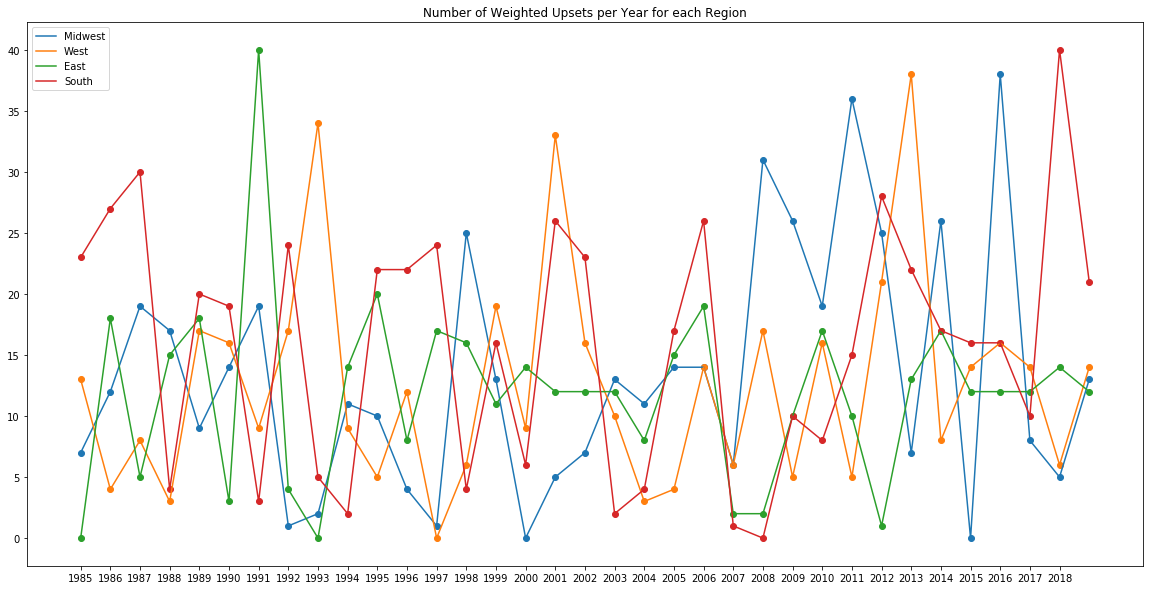

In [19]:
plt.scatter(df['Year'], df['Midwest'])
plt.plot(df['Year'], df['Midwest'], label = 'Midwest')

plt.scatter(df['Year'], df['West'])
plt.plot(df['Year'], df['West'], label = 'West')

plt.scatter(df['Year'], df['East'])
plt.plot(df['Year'], df['East'], label = 'East')

plt.scatter(df['Year'], df['South'])
plt.plot(df['Year'], df['South'], label = 'South')

plt.xticks(range(1985, 2019))
plt.legend()
plt.rcParams['figure.figsize'] = [20, 5]
plt.title("Number of Weighted Upsets per Year for each Region")
plt.show()

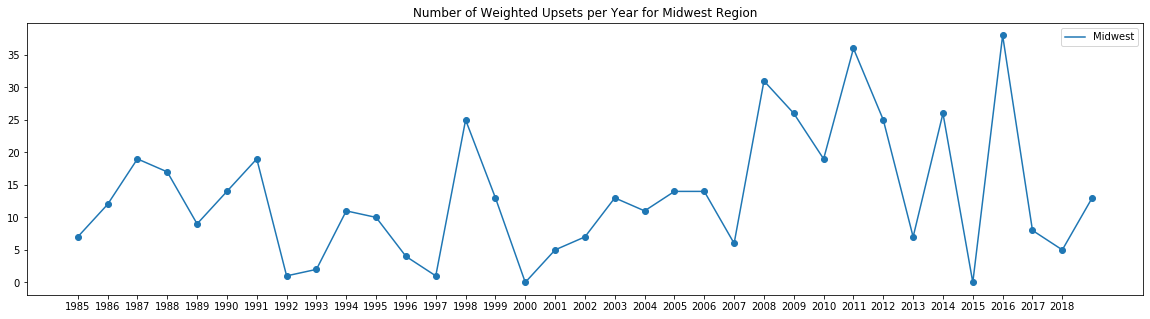

In [20]:
plt.scatter(df['Year'], df['Midwest'])
plt.plot(df['Year'], df['Midwest'], label = 'Midwest')
plt.xticks(range(1985, 2019))
plt.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.title("Number of Weighted Upsets per Year for Midwest Region")
plt.show()

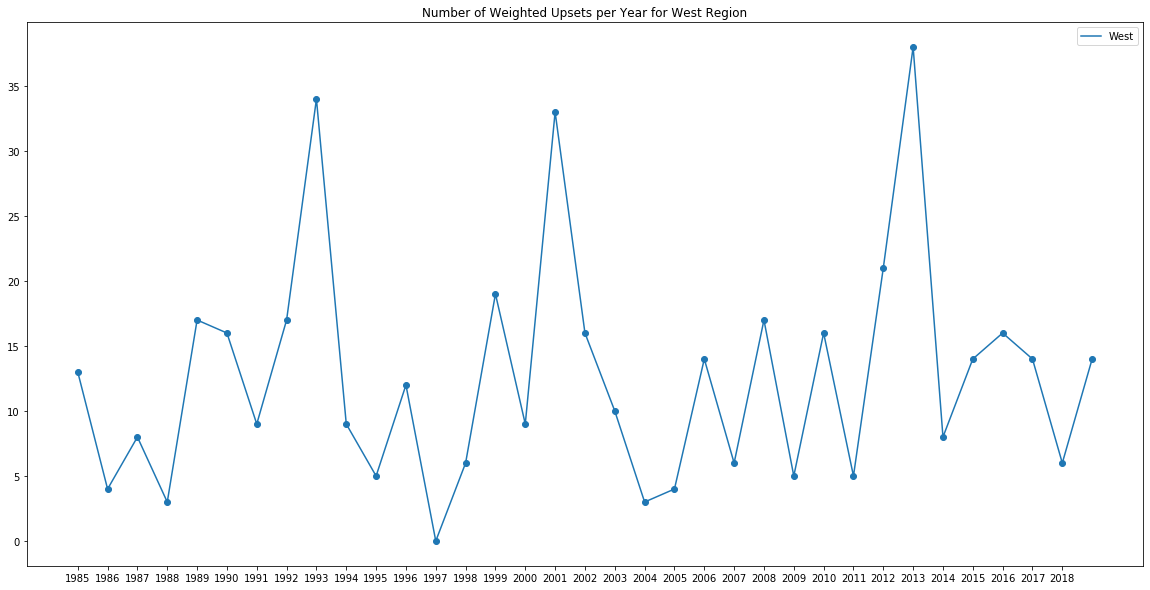

In [21]:
plt.scatter(df['Year'], df['West'])
plt.plot(df['Year'], df['West'], label = 'West')
plt.xticks(range(1985, 2019))
plt.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.title("Number of Weighted Upsets per Year for West Region")
plt.show()

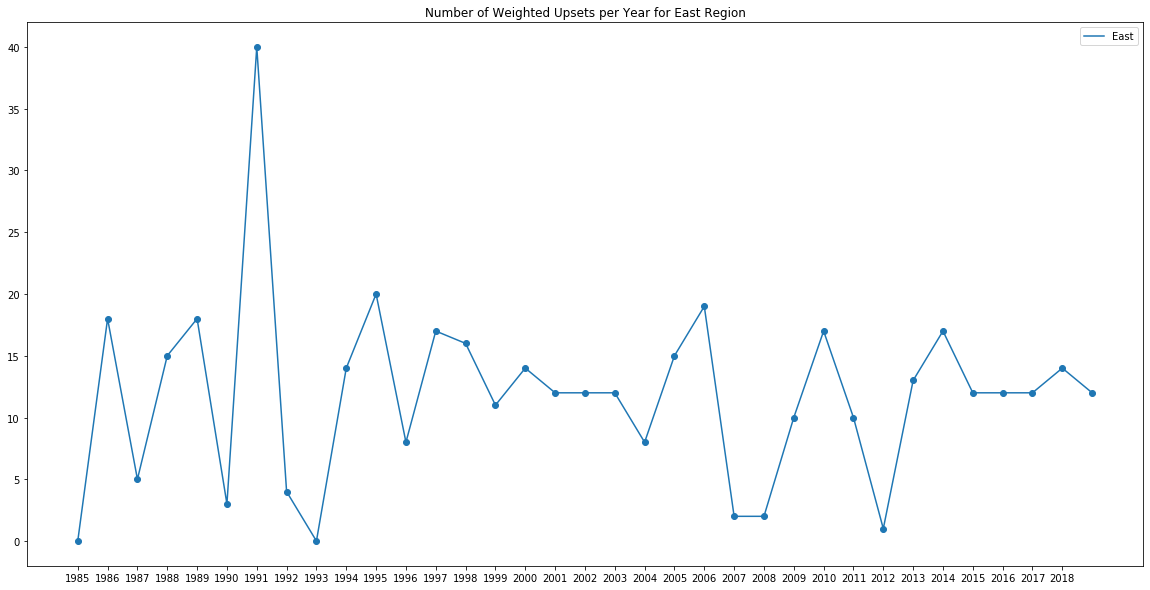

In [22]:
plt.scatter(df['Year'], df['East'])
plt.plot(df['Year'], df['East'], label = 'East')
plt.xticks(range(1985, 2019))
plt.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.title("Number of Weighted Upsets per Year for East Region")
plt.show()

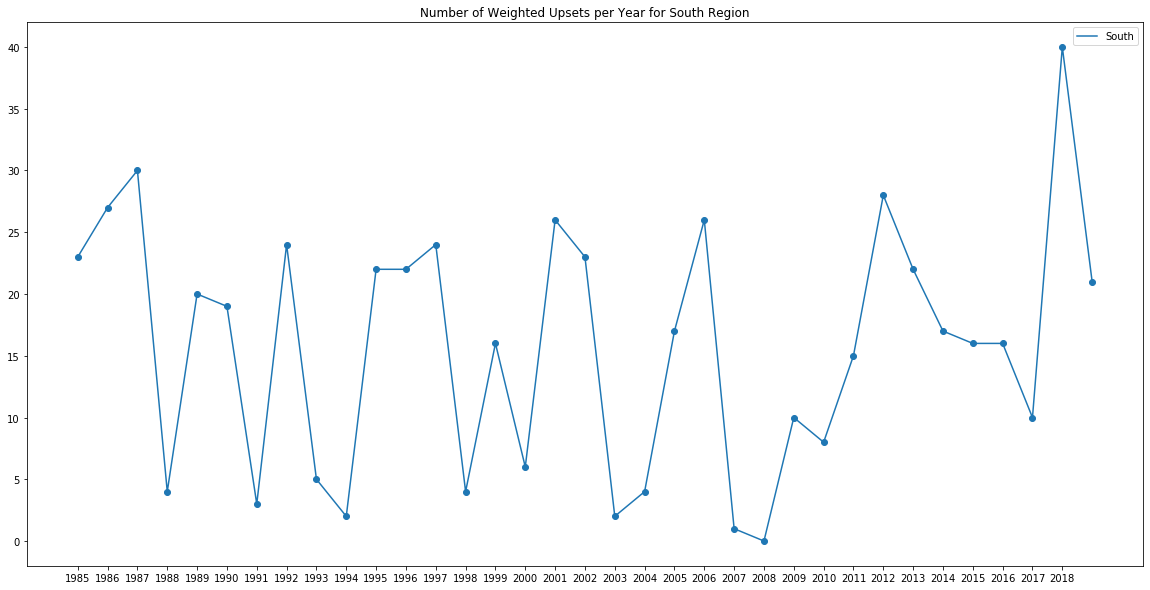

In [23]:
plt.scatter(df['Year'], df['South'])
plt.plot(df['Year'], df['South'], label = 'South')
plt.xticks(range(1985, 2019))
plt.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.title("Number of Weighted Upsets per Year for South Region")
plt.show()